# Titanic Dataset — Data Exploration

## Objective
Explore the Titanic dataset to understand its structure, missing values, and basic patterns before any preprocessing or modeling.

## Questions to Answer
- What does the data look like? (shape, types, sample rows)
- Which columns have missing values and how severe is it?
- What patterns exist between features and survival?
- Which features are likely useful for prediction?

## 1. Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')
df.shape

(891, 12)

## 2. Initial Inspection

A quick look at the first few rows, data types, and non-null counts to understand what we're working with.

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


### Unique Values per Column

In [4]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Initial Observations

- The dataset has **891 rows** (passengers) and **12 columns** (features)
- **Cabin** has the most missing values — 687 out of 891 (77% missing)
- **Age** has 177 missing values (20% missing) — will need imputation
- **Embarked** has only 2 missing values — easy to handle
- **Sex**, **Embarked**, and **Pclass** are categorical columns
- **PassengerId**, **Name**, and **Ticket** are identifiers, likely not useful as direct features
- **Survived** is our target variable (0 = died, 1 = survived)

## 3. Feature Distributions

Understanding how values are distributed helps us spot potential predictive features and decide on encoding strategies.

In [5]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [26]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [6]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [28]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

## 4. Missing Values

Identifying missing values upfront is critical — they will cause errors in most ML models if left unhandled.

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 5. Exploratory Data Analysis (EDA)

Now we look at how features relate to survival — this is where we find the patterns the model will eventually learn.

### Survival Distribution

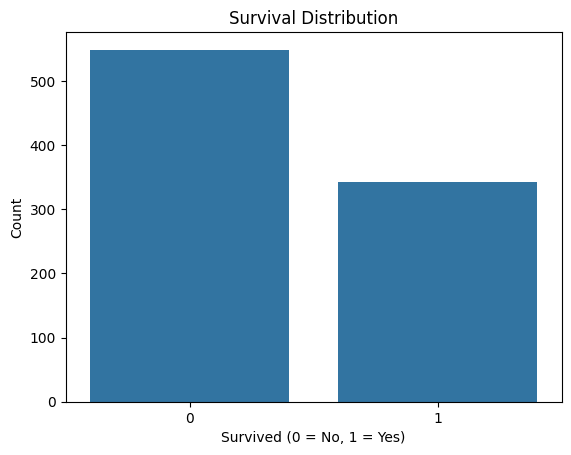

In [8]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

#### Observation

- A larger proportion of passengers did not survive, indicating **class imbalance** in the target variable.
- This means a naive model predicting "not survived" for everyone would already achieve ~61% accuracy — our model needs to beat this baseline.

### Survival by Gender

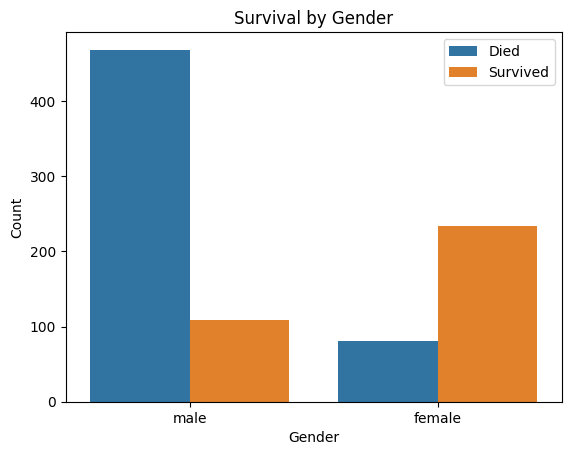

In [9]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Died', 'Survived'])
plt.show()

#### Observation

- Female passengers had a significantly higher survival rate than male passengers.
- Most male passengers did not survive, while most female passengers did.
- This indicates that **Sex is a very strong predictive feature** for survival.

### Survival by Passenger Class

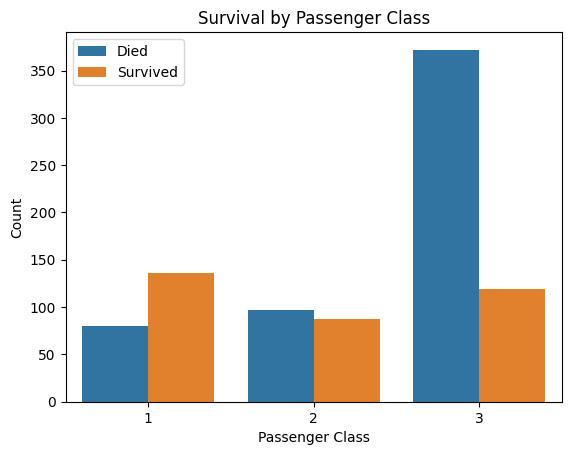

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Died', 'Survived'])
plt.show()

#### Observation

- First-class passengers had the highest survival rate, while third-class passengers had the lowest.
- Second-class passengers show a more balanced survival vs death rate.
- This suggests a strong relationship between **socio-economic status (Pclass) and survival probability**.

### Age Distribution

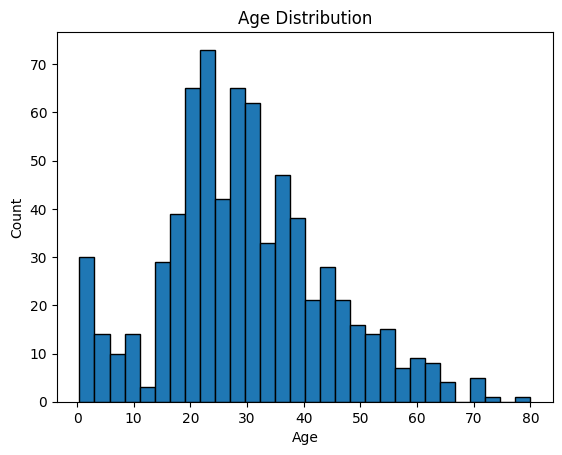

In [11]:
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Observation

- The majority of passengers were young adults between 20–40 years.
- There are fewer children and elderly passengers, but they form distinct groups.
- Age may influence survival, especially for children, and will require **handling missing values carefully**.

### Missing Values Visualization

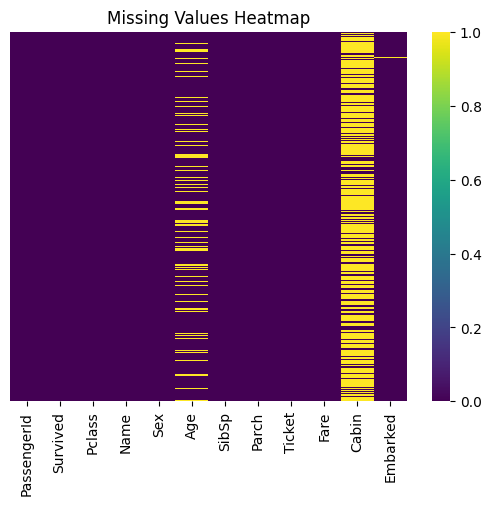

In [12]:
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

#### Observation

- The **Cabin** column contains a very high proportion of missing values and may be dropped or heavily engineered.
- **Age** has a significant number of missing values, requiring imputation.
- **Embarked** has very few missing values and can be handled easily.

## 6. Key Takeaways & Next Steps

### What we learned
- **Sex** is the strongest predictor — females survived at a much higher rate than males
- **Pclass** is the second strongest — first-class passengers had a clear survival advantage
- **Age** may matter (especially for children), but has 20% missing values that need careful handling
- **Cabin** is 77% missing — likely needs to be dropped or heavily engineered

### What needs to happen next
1. **Handle missing values** — impute Age and Embarked, decide on Cabin
2. **Encode categorical features** — convert Sex and Embarked to numbers
3. **Split data** — create train/test sets for fair evaluation
4. **Build a baseline model** — start simple (Logistic Regression) before trying complex models